In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
data = pd.read_csv('bank-additional.csv')

In [2]:
cat_to_code = data.select_dtypes(['object']).astype('category').apply(lambda x: x.cat.codes)
data[list(cat_to_code)] = cat_to_code
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [3]:
data = data.sample(frac=1)
data.head()

import numpy as np

# this sets the numpy to print numbers with float precision (this setting affects only the prints not the actual values)
np.set_printoptions(suppress=True)

xs, ys = np.split(data.values, [20], axis=1)

n_train = len(xs) * 80 // 100
xs_train, xs_test = np.split(xs, [n_train], axis=0)
ys_train, ys_test = np.split(ys, [n_train], axis=0)

print('training set shape:\t', xs_train.shape)
print('test set shape:\t\t', xs_test.shape)
print('training set Y shape:\t', ys_train.shape)
print('test set Y shape:\t', ys_test.shape)

training set shape:	 (3295, 20)
test set shape:		 (824, 20)
training set Y shape:	 (3295, 1)
test set Y shape:	 (824, 1)


In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'criterion': ["gini", "entropy"],
    'max_depth': range(1, 20)}]

tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, verbose=2)
grid_search.fit(xs_train, ys_train)

Fitting 5 folds for each of 38 candidates, totalling 190 fits
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini

[CV] END .....................criterion=entropy, max_depth=5; total time=   0.0s
[CV] END .....................criterion=entropy, max_depth=5; total time=   0.0s
[CV] END .....................criterion=entropy, max_depth=6; total time=   0.0s
[CV] END .....................criterion=entropy, max_depth=6; total time=   0.0s
[CV] END .....................criterion=entropy, max_depth=6; total time=   0.0s
[CV] END .....................criterion=entropy, max_depth=6; total time=   0.0s
[CV] END .....................criterion=entropy, max_depth=6; total time=   0.0s
[CV] END .....................criterion=entropy, max_depth=7; total time=   0.0s
[CV] END .....................criterion=entropy, max_depth=7; total time=   0.0s
[CV] END .....................criterion=entropy, max_depth=7; total time=   0.0s
[CV] END .....................criterion=entropy, max_depth=7; total time=   0.0s
[CV] END .....................criterion=entropy, max_depth=7; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(1, 20)}],
             verbose=2)

In [18]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3)

[Text(167.4, 190.26, 'X[19] <= 5087.65\nentropy = 0.503\nsamples = 3295\nvalue = [2929, 366]'),
 Text(83.7, 135.9, 'X[10] <= 225.0\nentropy = 0.993\nsamples = 405\nvalue = [223, 182]'),
 Text(41.85, 81.53999999999999, 'X[18] <= 0.723\nentropy = 0.805\nsamples = 207\nvalue = [156, 51]'),
 Text(20.925, 27.180000000000007, 'entropy = 1.0\nsamples = 55\nvalue = [27, 28]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.613\nsamples = 152\nvalue = [129, 23]'),
 Text(125.55000000000001, 81.53999999999999, 'X[12] <= 14.0\nentropy = 0.923\nsamples = 198\nvalue = [67, 131]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.516\nsamples = 52\nvalue = [6, 46]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.98\nsamples = 146\nvalue = [61, 85]'),
 Text(251.10000000000002, 135.9, 'X[10] <= 454.5\nentropy = 0.342\nsamples = 2890\nvalue = [2706, 184]'),
 Text(209.25, 81.53999999999999, 'X[17] <= -46.65\nentropy = 0.126\nsamples = 2484\nvalue = [2441, 43]'),
 Text(188.32500000000002, 27.

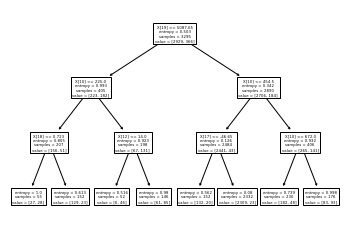

In [19]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth = 3)
tree_clf.fit(xs_train, ys_train)
from sklearn.tree import plot_tree
plot_tree(tree_clf)

In [20]:
from sklearn.metrics import accuracy_score
ys_train_pred = tree_clf.predict(xs_train)

print("The train accuracy is " , accuracy_score(ys_train, ys_train_pred))

ys_test_pred = tree_clf.predict(xs_test)

print("The test accuracy is " , accuracy_score(ys_test, ys_test_pred))

The train accuracy is  0.9116843702579667
The test accuracy is  0.9004854368932039
